In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# summarize dataset shape
print('Train:', trainX.shape, trainY.shape)
print('Test:', (testX.shape, testY.shape))

# summarize pixel values
print('Train:', trainX.min(), trainX.max())
print('Test:', testX.min(), testX.max())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: (60000, 28, 28) (60000,)
Test: ((10000, 28, 28), (10000,))
Train: 0 255
Test: 0 255


In [2]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare a iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

# confirm the scaling works
batchX, batchy = next(train_iterator)
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))



Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

# load the image
img1 = load_img('bird.jpg', color_mode='rgb')
img2 = load_img('bird.jpg', color_mode='grayscale')

# report details about the image
print(type(img1))
print(img1.format)
print(img1.mode)
print('RGB channels', img_to_array(img1).shape[-1])
print(img1.size)
# show the color image
img1.show()

# show gray scale image
print(img2.mode)
print('Grayscale channels', img_to_array(img2).shape[-1])
print(img2.size)
img2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'bird.jpg'

Original shape : (399, 640, 3)
Scaled shape   : (798, 1280, 3)
Original shape : (399, 640, 3)
Scaled shape   : (199, 320, 3)


(np.float64(-0.5), np.float64(319.5), np.float64(198.5), np.float64(-0.5))

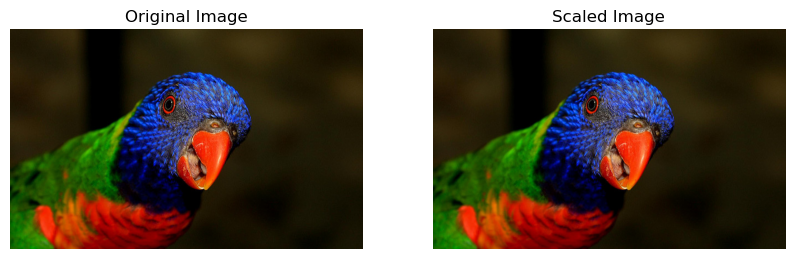

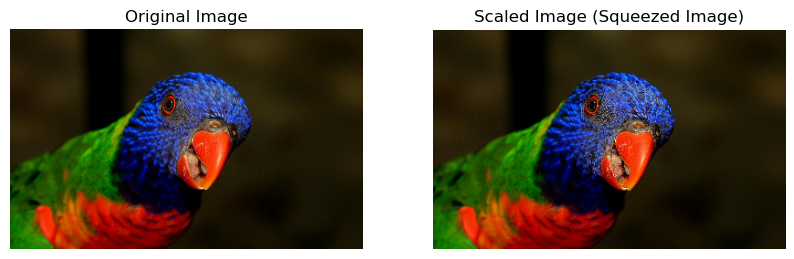

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("bird.jpg").convert("RGB")
img_np = np.array(img)

h, w, c = img_np.shape

# -------------------------------
# 2. Define scaling factors
# -------------------------------
sx = 2   # scale in x-direction
sy = 2   # scale in y-direction

# -------------------------------
# 3. Affine scaling matrix (Homogeneous)
# -------------------------------
S = np.array([
    [sx, 0,  0],
    [0,  sy, 0],
    [0,  0,  1]
])

# -------------------------------
# 4. Output image size
# -------------------------------
new_h = int(h * sy)
new_w = int(w * sx)

scaled_img = np.zeros((new_h, new_w, c), dtype=np.uint8)

# -------------------------------
# 5. Inverse mapping (important)
# -------------------------------
S_inv = np.linalg.inv(S)

# -------------------------------
# 6. Apply affine transform manually
# -------------------------------
for y_new in range(new_h):
    for x_new in range(new_w):

        # Homogeneous coordinate
        target = np.array([x_new, y_new, 1])

        # Map back to source
        src = S_inv @ target
        x_src, y_src = int(src[0]), int(src[1])

        # Check bounds
        if 0 <= x_src < w and 0 <= y_src < h:
            scaled_img[y_new, x_new] = img_np[y_src, x_src]

print("Original shape :", img_np.shape)
print("Scaled shape   :", scaled_img.shape)

# -------------------------------
# 7. Display images
# -------------------------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_np)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Scaled Image")
plt.imshow(scaled_img)
plt.axis("off")



# Scaling factors (squeeze)
sx, sy = 0.5, 0.5

S = np.array([
    [sx, 0,  0],
    [0,  sy, 0],
    [0,  0,  1]
])

S_inv = np.linalg.inv(S)

out_h = int(h * sy)
out_w = int(w * sx)

scaled_img = np.zeros((out_h, out_w, c), dtype=np.uint8)

for y_out in range(out_h):
    for x_out in range(out_w):

        target = np.array([x_out, y_out, 1])
        src = S_inv @ target

        x_src = int(src[0])
        y_src = int(src[1])

        if 0 <= x_src < w and 0 <= y_src < h:
            scaled_img[y_out, x_out] = img_np[y_src, x_src]

print("Original shape :", img_np.shape)
print("Scaled shape   :", scaled_img.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_np)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Scaled Image (Squeezed Image)")
plt.imshow(scaled_img)
#plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

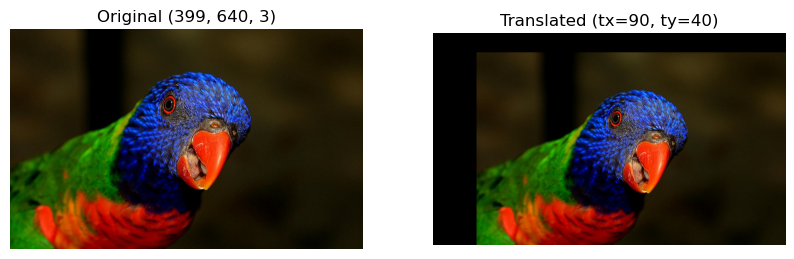

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------------
# 1. Load image (NumPy array)
# -------------------------------
img = Image.open("bird.jpg").convert("RGB")
img_np = np.array(img)

h, w, c = img_np.shape

# -------------------------------
# 2. Translation values
# -------------------------------
tx = 90   # shift right by 80 pixels
ty = 40   # shift down by 50 pixels

# -------------------------------
# 3. Translation matrix (Homogeneous)
# -------------------------------
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

T_inv = np.linalg.inv(T)

# -------------------------------
# 4. Output canvas size
# -------------------------------
out_h = h + ty
out_w = w + tx

translated_img = np.zeros((out_h, out_w, c), dtype=np.uint8)

# -------------------------------
# 5. Manual inverse mapping
# -------------------------------
for y_out in range(out_h):
    for x_out in range(out_w):

        target = np.array([x_out, y_out, 1])
        src = T_inv @ target

        x_src = int(src[0])
        y_src = int(src[1])

        if 0 <= x_src < w and 0 <= y_src < h:
            translated_img[y_out, x_out] = img_np[y_src, x_src]

# -------------------------------
# 6. Display results
# -------------------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title(f"Original {img_np.shape}")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Translated (tx={tx}, ty={ty})")
plt.imshow(translated_img)
plt.axis("off")

plt.show()


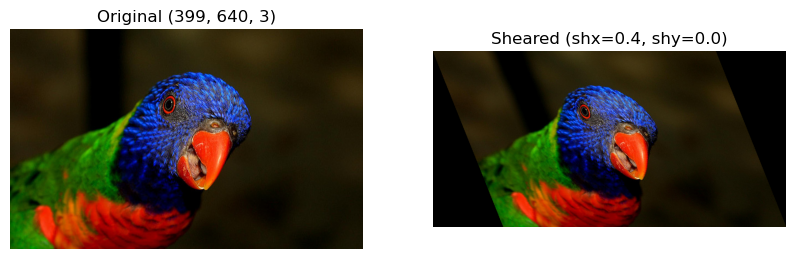

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------------
# 1. Load image (NumPy array)
# -------------------------------
img = Image.open("bird.jpg").convert("RGB")
img_np = np.array(img)

h, w, c = img_np.shape

# -------------------------------
# 2. Shearing factors
# -------------------------------
shx = 0.4   # horizontal shear
shy = 0.0   # vertical shear

# -------------------------------
# 3. Shearing matrix (Homogeneous)
# -------------------------------
Sh = np.array([
    [1,  shx, 0],
    [shy, 1,  0],
    [0,  0,   1]
])

Sh_inv = np.linalg.inv(Sh)

# -------------------------------
# 4. Output canvas size
# -------------------------------
out_h = h + int(abs(shy) * w)
out_w = w + int(abs(shx) * h)

sheared_img = np.zeros((out_h, out_w, c), dtype=np.uint8)

# -------------------------------
# 5. Manual inverse mapping
# -------------------------------
for y_out in range(out_h):
    for x_out in range(out_w):

        target = np.array([x_out, y_out, 1])
        src = Sh_inv @ target

        x_src = int(src[0])
        y_src = int(src[1])

        if 0 <= x_src < w and 0 <= y_src < h:
            sheared_img[y_out, x_out] = img_np[y_src, x_src]

# -------------------------------
# 6. Display results
# -------------------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title(f"Original {img_np.shape}")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Sheared (shx={shx}, shy={shy})")
plt.imshow(sheared_img)
plt.axis("off")

plt.show()


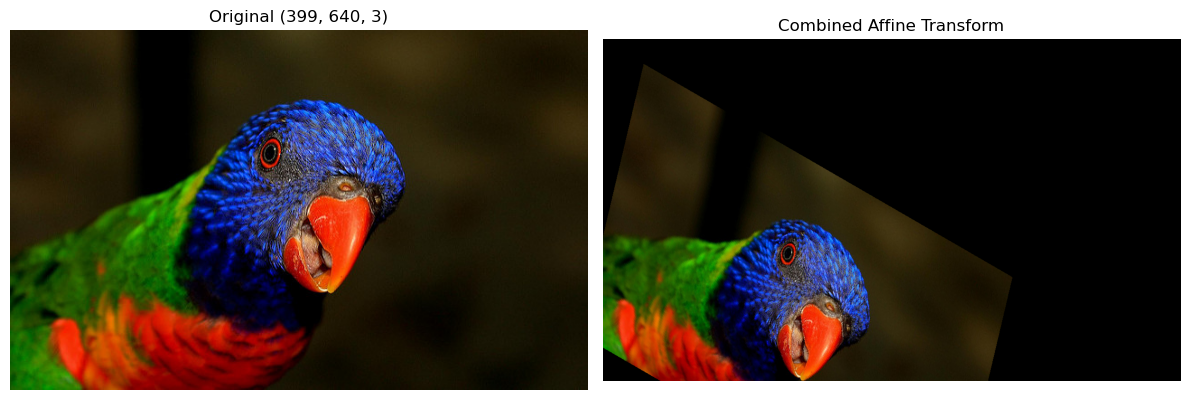

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------------------------
# 1. Load image (NumPy array)
# ---------------------------------
img = Image.open("bird.jpg").convert("RGB")
img = np.array(img)

h, w, c = img.shape

# ---------------------------------
# 2. Transformation parameters
# ---------------------------------
sx, sy = 1.3, 1.3          # scaling
theta = 30                # rotation (degrees)
shx, shy = 0.3, 0.0       # shearing
tx, ty = 80, 50           # translation

theta = np.deg2rad(theta)

# ---------------------------------
# 3. Homogeneous matrices
# ---------------------------------
S = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0,  0, 1]
])

R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])

Sh = np.array([
    [1, shx, 0],
    [shy, 1, 0],
    [0, 0, 1]
])

T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# ---------------------------------
# 4. Combined affine matrix
# ---------------------------------
A = T @ R @ Sh @ S
A_inv = np.linalg.inv(A)

# ---------------------------------
# 5. Output canvas size (safe bounds)
# ---------------------------------
out_h = int(h * sy + abs(ty) + abs(shy) * w + 100)
out_w = int(w * sx + abs(tx) + abs(shx) * h + 100)

output = np.zeros((out_h, out_w, c), dtype=np.uint8)

# ---------------------------------
# 6. Manual inverse mapping
# ---------------------------------
for y_out in range(out_h):
    for x_out in range(out_w):

        target = np.array([x_out, y_out, 1])
        src = A_inv @ target

        x_src = int(src[0])
        y_src = int(src[1])

        if 0 <= x_src < w and 0 <= y_src < h:
            output[y_out, x_out] = img[y_src, x_src]

# ---------------------------------
# 7. Display results
# ---------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title(f"Original {img.shape}")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Combined Affine Transform")
plt.imshow(output)
plt.axis("off")

plt.tight_layout()
plt.show()
